Zmierz się z problemem identyfikacji rodzaju szkła. W tym celu wykorzystaj jeden ze zbiorów danych
UCI - GLASS. Zadania powinny być wykonane z pomocą Pythona i/lub WEKI. Punktacja:
1. eksploracja danych – przedstaw podstawowe dane statystyczne i uwagi dotyczące cech i etykiet
zbioru danych. (10 punktów)
2. przygotowanie danych – podziel dane na zestaw uczący i walidacyjny (alternatywnie użyj walidacji krzyżowej), zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)
Bonus – usuń 5% wartości cech i przygotuj dane stosując metody radzenia sobie z brakującymi
danymi. (5 punktów)
3. klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)
4. ocena klasyfikacji – do porównania wyników różnego typu przygotowania danych oraz wykorzystanego klasyfikatora użyj poznanych metryk oceny klasyfikacji i zinterpretuj wyniki. (20
punktów)
4
Do zadania przygotuj raport zawierający krótki opis wszystkich wykonywanych kroków oraz rezultatów zadania (najlepiej zebranych tabeli) wraz z interpretacją. W raporcie wskaż wykorzystane
materiały źródłowe oraz krótko opisz biblioteki wykorzystane przy implementacji. Raport wyślij prowadzącemu przynajmniej na 24 godziny przed oddaniem listy.


Importowanie danych

In [2]:
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
# downolad and save csv file
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
if 'glass_data.csv' in os.listdir(): # check if file exists in current directory if not download it
    glass_data = pd.read_csv('glass_data.csv')
else:
    glass_data = pd.read_csv(data_url, names=column_names)
    glass_data.to_csv('glass_data.csv', index=False)


print(glass_data.head(20))

    Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  14

d number: od 1 do 214 (usunięte z pliku CSV)

RI: współczynnik załamania światła
Na: Sód (jednostka miary: procent wagowy w odpowiednim tlenku, podobnie jak atrybuty 4-10)
Mg: Magnez
Al: aluminium
K: Potas
Ca: Wapń
Ba: Bar
Fe: Żelazo
Rodzaj szkła: (atrybut klasy) [1-7]
Building_windows_float_processed
Building_windows_non_float_processed
Vehicle_windows_float_processed
Vehicle_windows_non_float_processed
Pojemniki
Zastawa stołowa
Reflektory


eksploracja danych

In [3]:
glass_data.shape

(214, 11)

dataset ma 214 wierszy i 10 kolumn

In [4]:
glass_data.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

dataset nie ma brakujących danych

In [5]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


pokaz type

In [6]:
print(glass_data['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


<Axes: xlabel='Type', ylabel='count'>

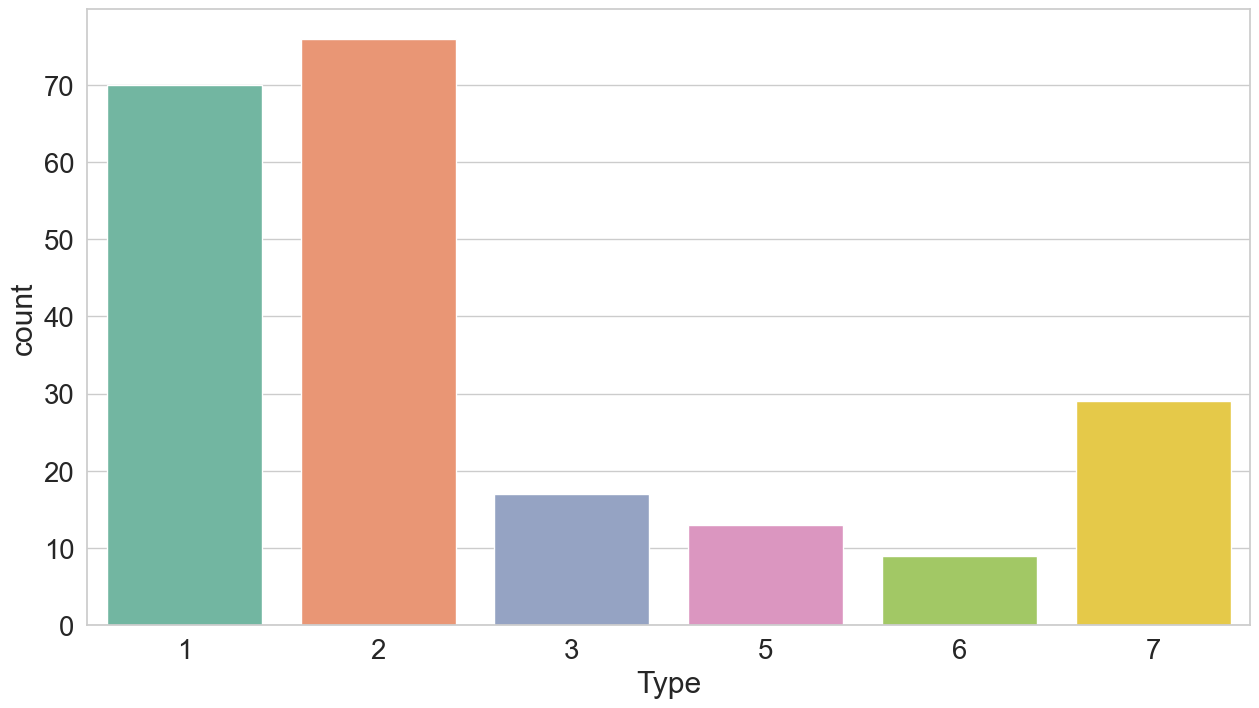

In [7]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x="Type", data=glass_data, palette="Set2")

In [8]:
print(glass_data.describe())

               Id          RI          Na          Mg          Al          Si   
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000  \
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739 

wynioski z eksploracji danych:
Powyższe statystyki pokazują, że dane we wszystkich atrybutach nie są w tym samym zakresie, więc najpierw znormalizujemy dane

przygotowanie danych

Usuwanie niepotrzebnej kolumny Id

In [9]:
glass_data.drop(['Id'], axis=1, inplace=True)
glass_data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


Odseparowanie kolumny klasy od reszty danych

In [10]:
y = glass_data['Type']

X = glass_data.drop('Type', axis=1)

X.shape

(214, 9)

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
y.shape

(214,)

Nasz wykres pokazuje korelację między różnymi cechami Wnioski:

RI i Ca mają silną korelację między sobą
AI i ba mają pośrednią korelację między sobą

C:\Users\filip\AppData\Local\Temp\ipykernel_13696\399901726.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


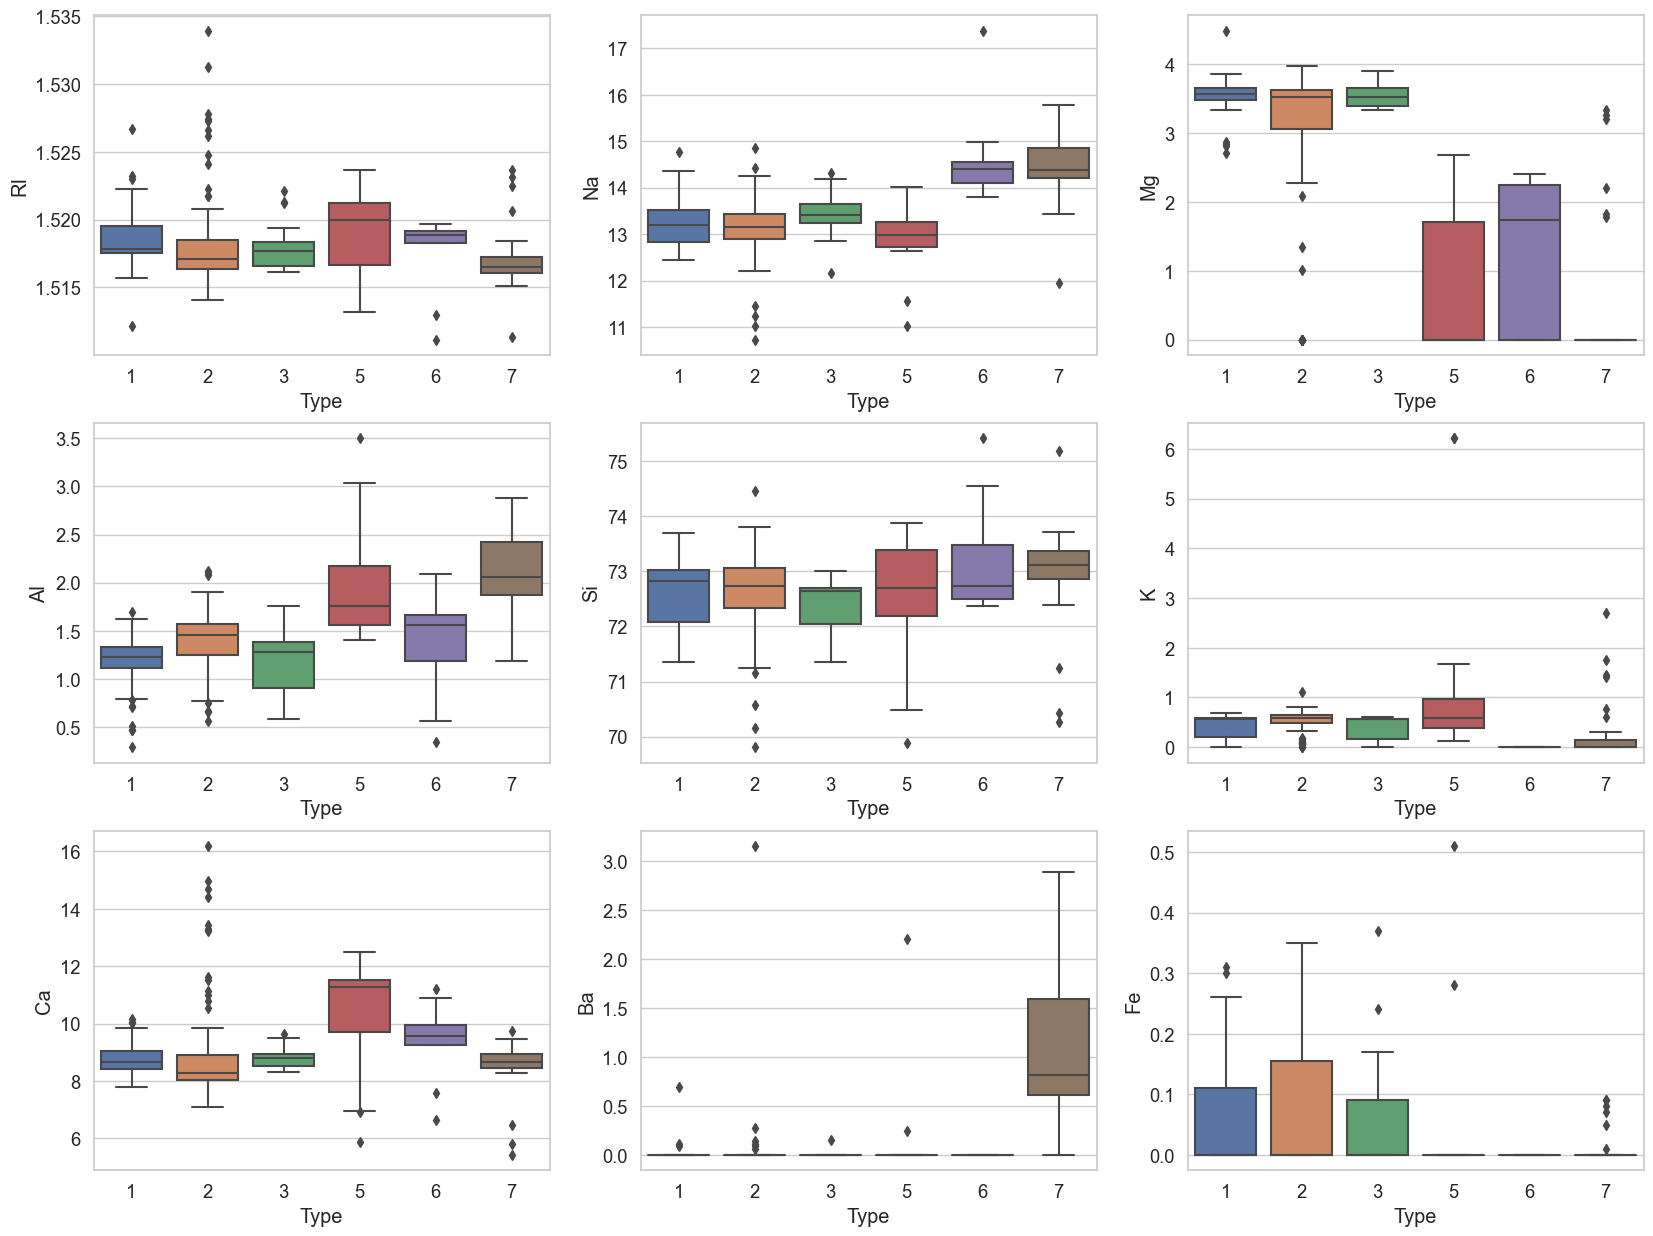

In [13]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_data)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_data)
plt.show()

Wykres pudełkowy pokazuje, że średni współczynnik załamania światła jest podobny dla wszystkich typów. Chociaż typ 5 ma szerszy zakres i nieco wyższą średnią. Zawartość sodu jest wyższa w typie 6 i 7, podczas gdy zawartość magnezu jest dość wysoka w typie 1, 2 i 3. Glin jest wyższy w typie 5 i 7. Krzemionka nie dostarcza wielu informacji do rozróżnienia, ponieważ ma najwyższe stężenie spośród wszystkich minerałów, ale ma podobny zakres dla wszystkich typów. Potas również nie zapewnia wiele wglądu. Ale jest wyższy w pojemnikach typu 5, ponieważ K jest używany w hartowanym szkle, które jest używane do wytwarzania przedmiotów pyrex. Wapń jest najwyższy w typie 5, a bar w typie 7. Żelazo występuje w bardzo niskim stężeniu, jednak typy 1, 2 i 3 mają wyższe wartości dla niektórych szkieł niż pozostałe. Dzieje się tak dlatego, że żelazo dodaje się głównie do kolorowych szkieł. Mamy pewien pomysł na to, która funkcja zapewnia lepszy wgląd w odróżnianie jednego typu od drugiego. Teraz zobaczmy związek między każdym z nich za pomocą wykresu pary. (Pominiemy K, Ba i Fe ze względu na rzadkie stężenie)

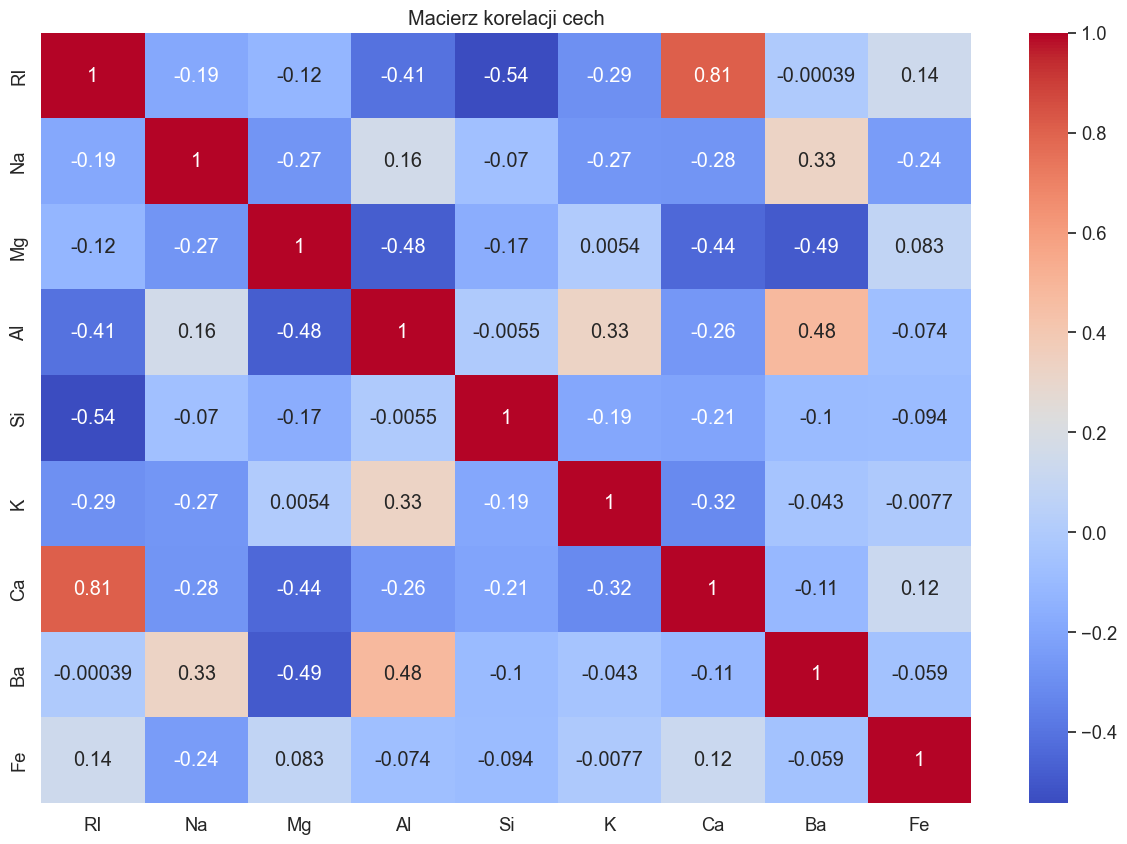

In [14]:
correlation_matrix = X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji cech')
plt.show()

Train Test Split Podział danych na zestaw uczący i walidacyjny


Najpierw zastosujemy model bez przetwarzania danych

C:\Users\filip\AppData\Local\Temp\ipykernel_13696\1593171853.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


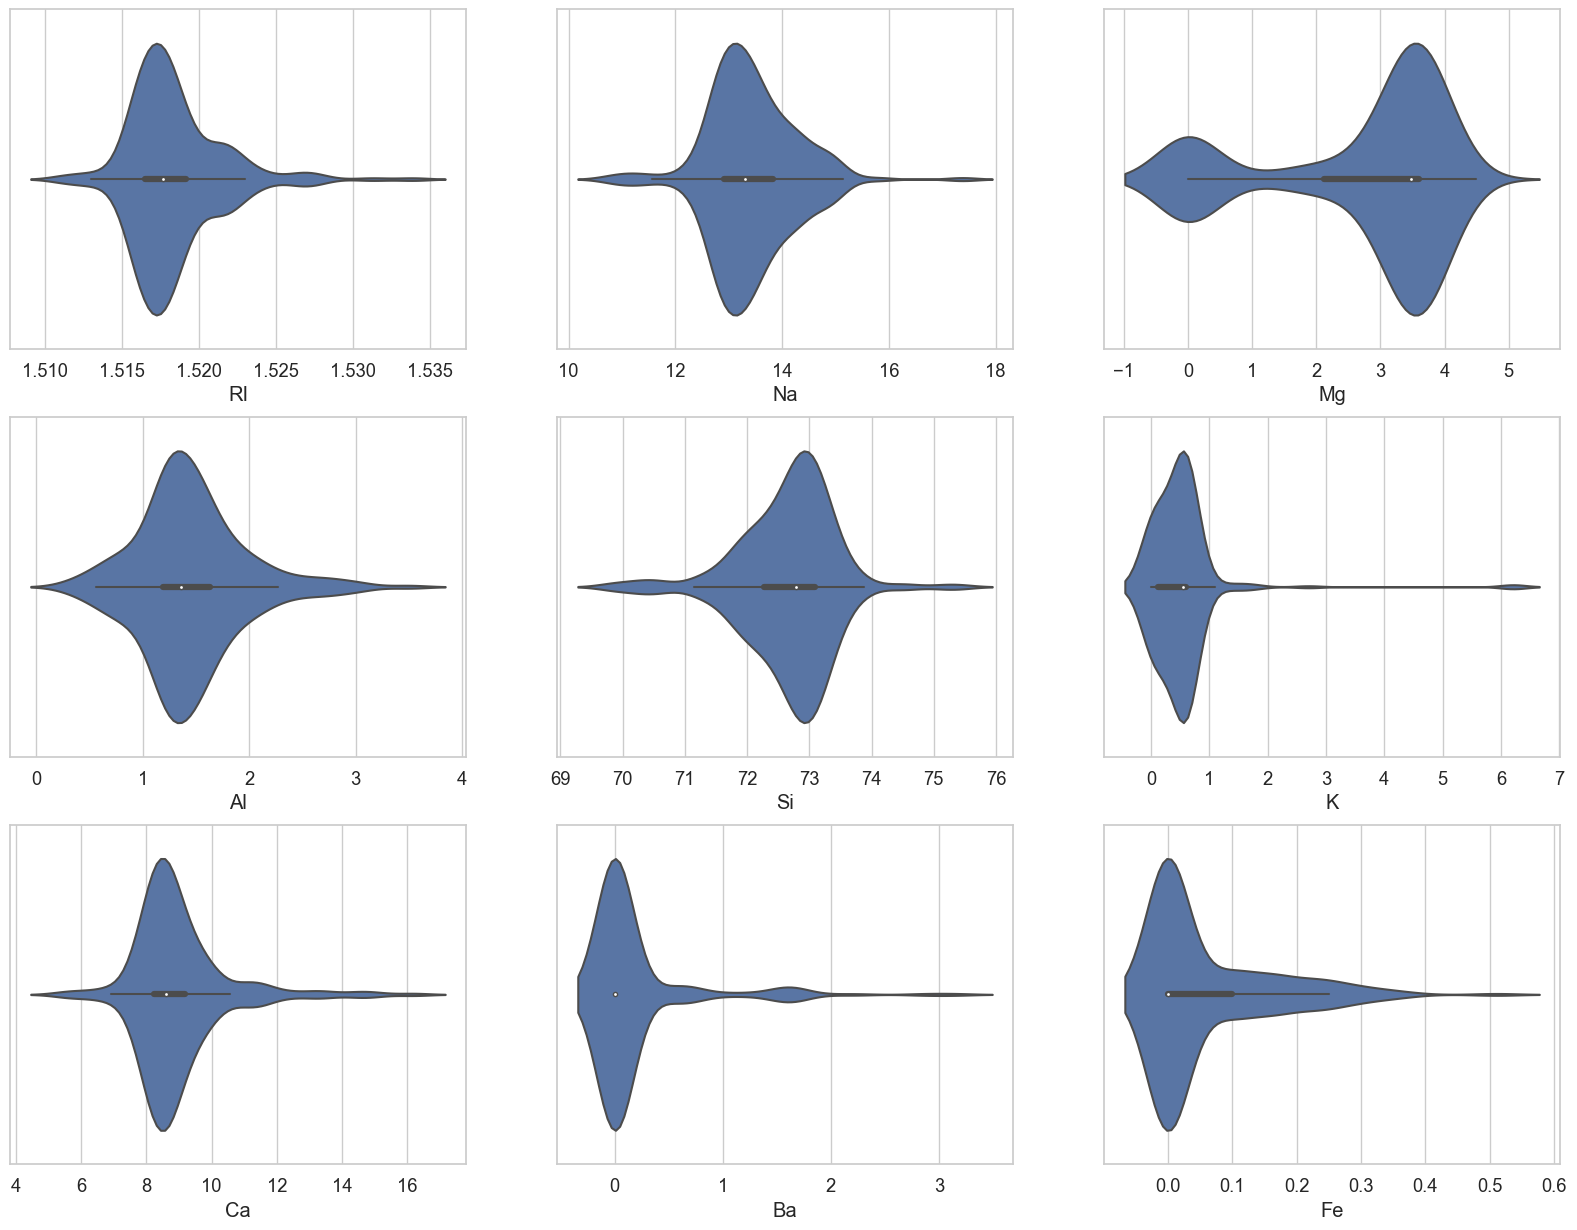

In [15]:
# show X distribution of values as a violin plot of each column show it using sublots in a loop
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
for i, col in enumerate(X.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=col, data=X)



C:\Users\filip\AppData\Local\Temp\ipykernel_13696\990365414.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


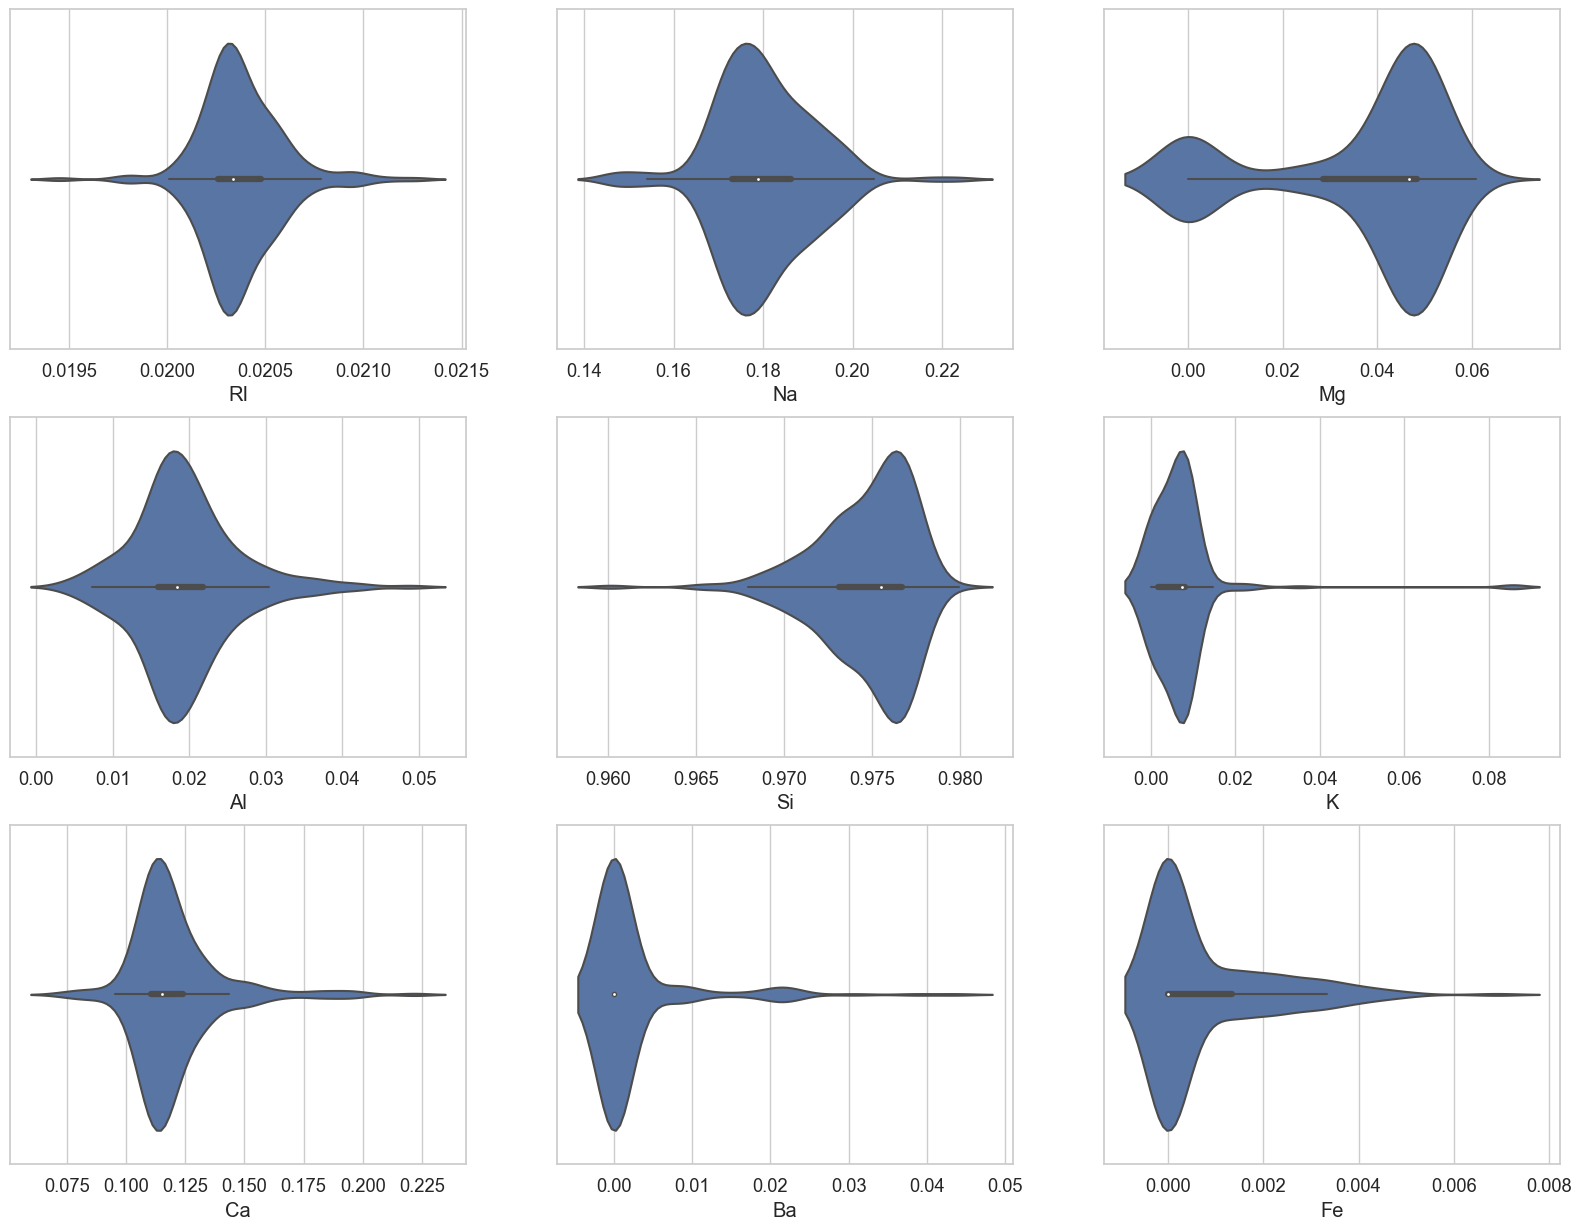

In [16]:
# Normalizer
normalized_X = Normalizer().fit_transform(X)

normalized_X_DF = pd.DataFrame(normalized_X, columns=X.columns)

# show results as a violin plot of each column using sublots in a loop
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
for i, col in enumerate(normalized_X_DF.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=col, data=normalized_X_DF)






C:\Users\filip\AppData\Local\Temp\ipykernel_13696\2535582140.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


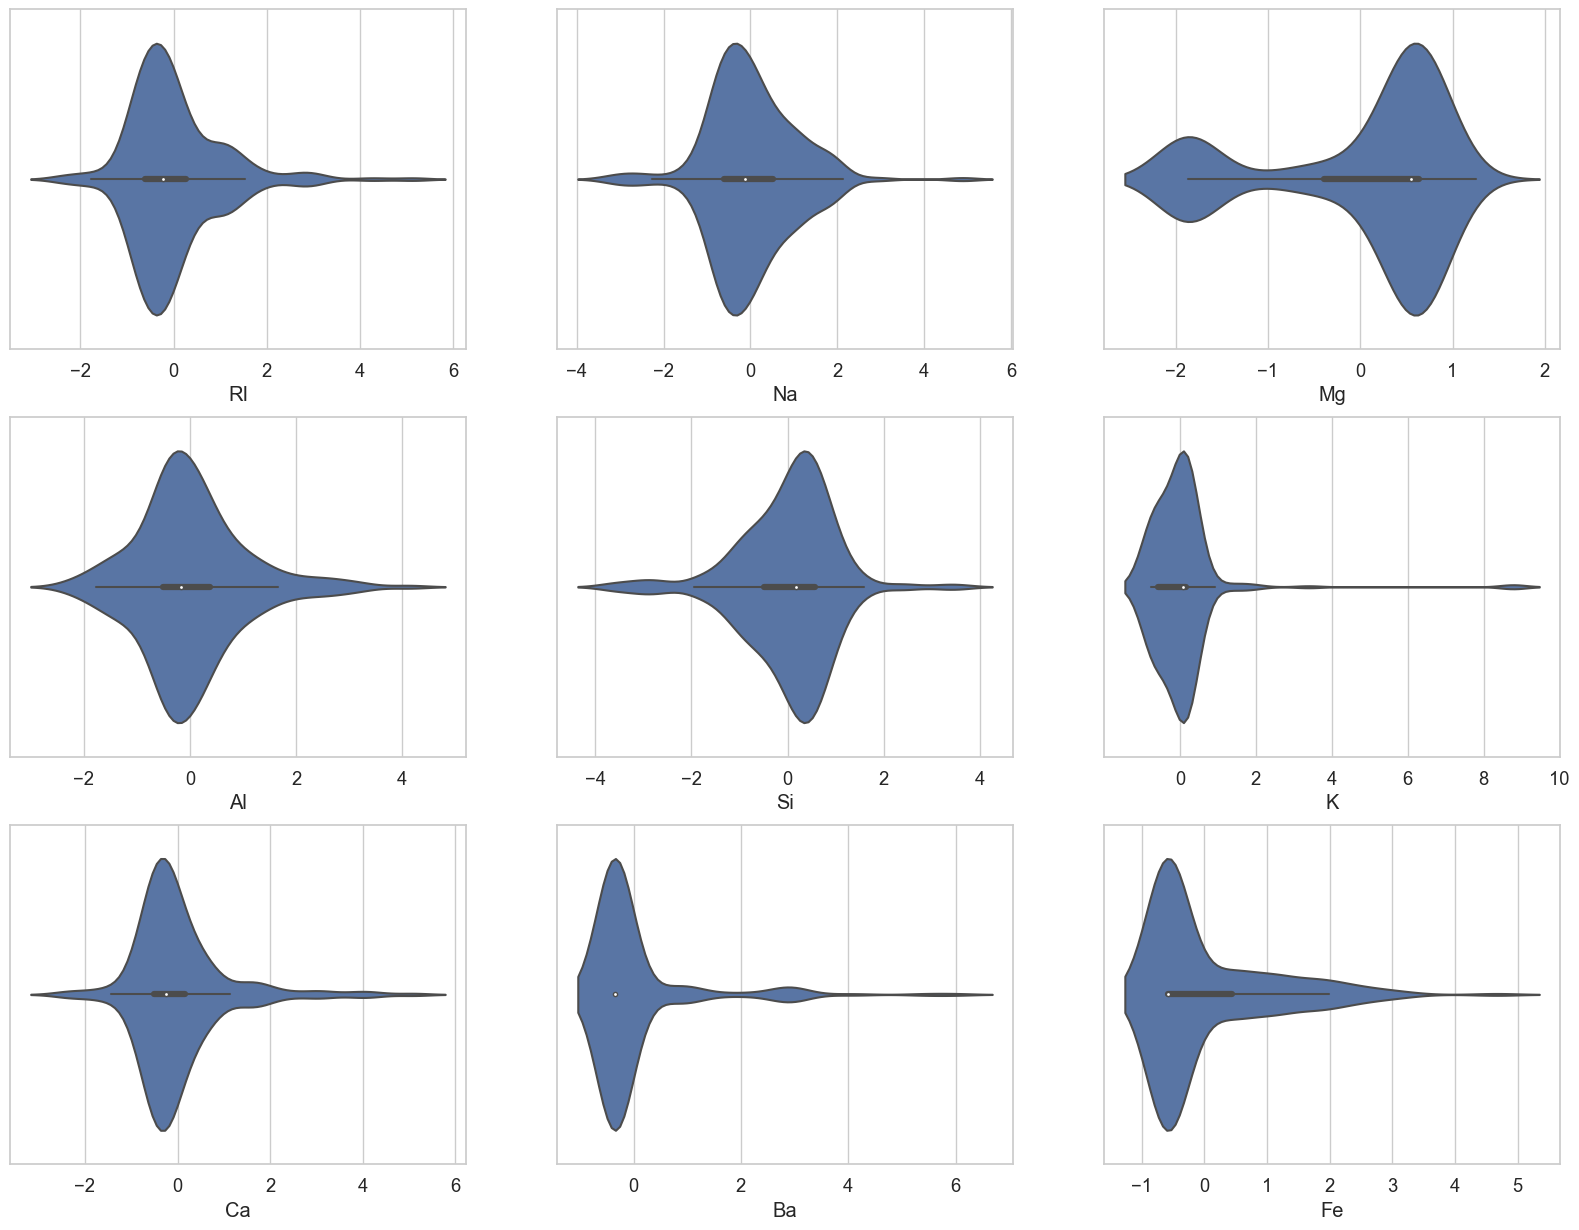

In [17]:
# standarize data and store it in standarized_X variable
standarized_X = StandardScaler().fit_transform(X)
# show first 5 rows of standarized_X
standarized_X_DF = pd.DataFrame(standarized_X, columns=X.columns)

#  i want to display histogram of eacy column in standarized_X_DF as a violin plot
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
for i, col in enumerate(standarized_X_DF.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=col, data=standarized_X_DF)


In [18]:

# PCA - Principal Component Analysis - reduce dimensionality of data
# use PCA to reduce dimensionality of data of X 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_DF.head()

,PC1,PC2
0,-1.431425,-1.102115
1,-1.436707,0.343585
2,-1.427322,0.345720
3,-1.257825,-0.249060
4,-1.312466,-0.018405


Text(0.5, 1.0, 'PCA')

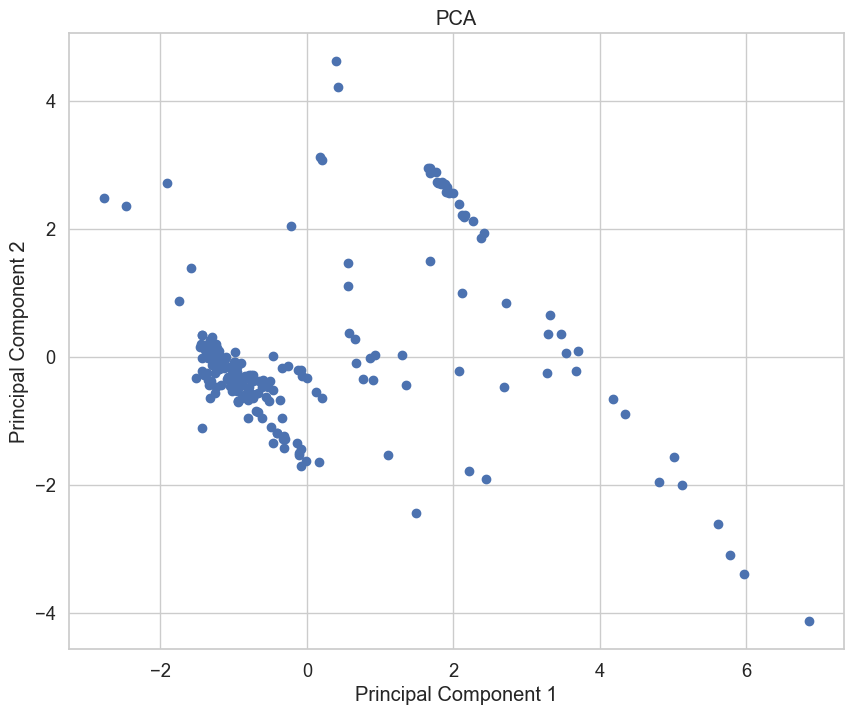

In [19]:
# show PCA results as a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(principal_DF['PC1'], principal_DF['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')

In [20]:
# discrete data X to discrete_X
discrete_X = pd.DataFrame(pd.cut(X['RI'], bins=3, labels=[1, 2, 3]))
discrete_X.head()


,RI
0,2
1,1
2,1
3,1
4,1


zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)

In [21]:
# split data into train and vaildation sets for each of X and y sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=53, stratify=y)

X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(normalized_X, y, test_size=0.3, random_state=53, stratify=y)

X_train_stand, X_val_stand, y_train_stand, y_val_stand = train_test_split(standarized_X, y, test_size=0.3, random_state=53, stratify=y)

X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(principal_DF, y, test_size=0.3, random_state=53, stratify=y)

X_train_discrete, X_val_discrete, y_train_discrete, y_val_discrete = train_test_split(discrete_X, y, test_size=0.3, random_state=53, stratify=y)

In [22]:
## Flattening the array
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

y_train_norm = y_train_norm.values.ravel()
y_val_norm = y_val_norm.values.ravel()

y_train_stand = y_train_stand.values.ravel()
y_val_stand = y_val_stand.values.ravel()

y_train_pca = y_train_pca.values.ravel()
y_val_pca = y_val_pca.values.ravel()

y_train_discrete = y_train_discrete.values.ravel()
y_val_discrete = y_val_discrete.values.ravel()



In [23]:
from sklearn.tree import DecisionTreeClassifier


In [24]:

# make a functiion that will train and test model as arguments it gest data and model and returns accuracy, precision, recall, f1
def train_and_test_model(X_train, X_val, y_train, y_val, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# train and test model of naive bayes GaussianNB of each data, not processed, normalized, standarized, PCA, discrete


Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
Accuracy:  0.5076923076923077
Precision:  0.49158119658119653
Recall:  0.5076923076923077
F1:  0.45328994775716086
Accuracy:  0.49230769230769234
Precision:  0.4173076923076923
Recall:  0.49230769230769234
F1:  0.4249013806706114
Accuracy:  0.4153846153846154
Precision:  0.2762138570649209
Recall:  0.4153846153846154
F1:  0.3181741335587489


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


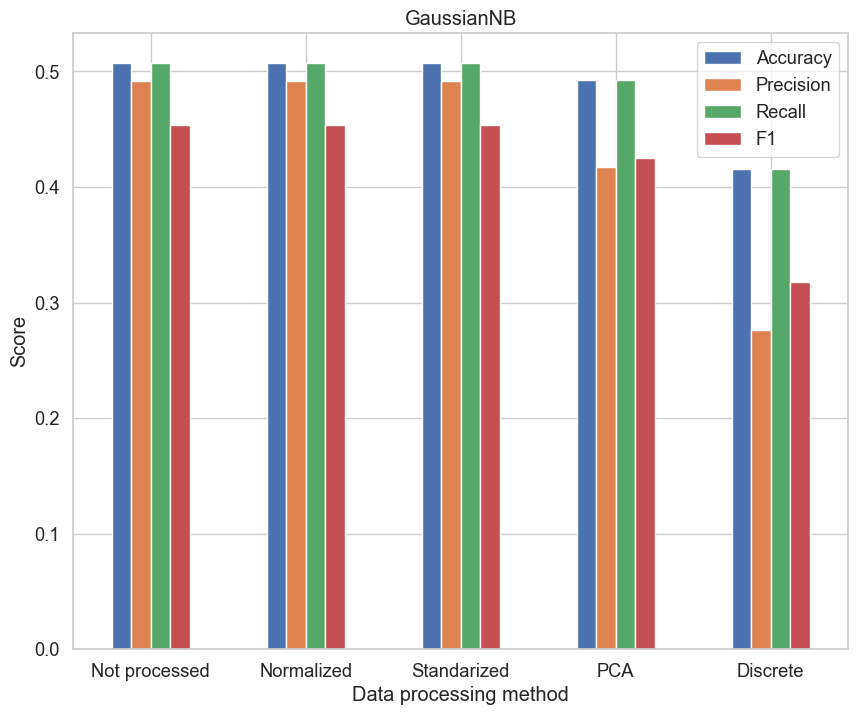

In [25]:

accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, GaussianNB())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy_norm, precision_norm, recall_norm, f1_norm = train_and_test_model(X_train_norm, X_val_norm, y_train_norm, y_val_norm, GaussianNB())
print('Accuracy: ', accuracy_norm)
print('Precision: ', precision_norm)
print('Recall: ', recall_norm)
print('F1: ', f1_norm)

accuracy_stand, precision_stand, recall_stand, f1_stand = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, GaussianNB())
print('Accuracy: ', accuracy_stand)
print('Precision: ', precision_stand)
print('Recall: ', recall_stand)
print('F1: ', f1_stand)

accuracy_pca, precision_pca, recall_pca, f1_pca = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, GaussianNB())
print('Accuracy: ', accuracy_pca)
print('Precision: ', precision_pca)
print('Recall: ', recall_pca)
print('F1: ', f1_pca)

accuracy_discrete, precision_discrete, recall_discrete, f1_discrete = train_and_test_model(X_train_discrete, X_val_discrete, y_train_discrete, y_val_discrete, GaussianNB())
print('Accuracy: ', accuracy_discrete)
print('Precision: ', precision_discrete)
print('Recall: ', recall_discrete)
print('F1: ', f1_discrete)

# compare results of each data processing method in a table
results = pd.DataFrame({'Accuracy': [accuracy, accuracy_norm, accuracy_stand, accuracy_pca, accuracy_discrete],
                        'Precision': [precision, precision_norm, precision_stand, precision_pca, precision_discrete],
                        'Recall': [recall, recall_norm, recall_stand, recall_pca, recall_discrete],
                        'F1': [f1, f1_norm, f1_stand, f1_pca, f1_discrete]},
                        index=['Not processed', 'Normalized', 'Standarized', 'PCA', 'Discrete'])
results

# visualise it in a bar chart
results.plot(kind='bar', figsize=(10, 8))
plt.title('GaussianNB')
plt.xlabel('Data processing method')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))



Accuracy:  0.6615384615384615
Precision:  0.7121794871794871
Recall:  0.6615384615384615
F1:  0.6764110717051893
Accuracy:  0.6461538461538462
Precision:  0.639090909090909
Recall:  0.6461538461538462
F1:  0.6415026833631484
Accuracy:  0.6615384615384615
Precision:  0.6983760683760684
Recall:  0.6615384615384615
F1:  0.6717742011359031
Accuracy:  0.5846153846153846
Precision:  0.5923076923076923
Recall:  0.5846153846153846
F1:  0.5752902757619739
Accuracy:  0.4153846153846154
Precision:  0.2762138570649209
Recall:  0.4153846153846154
F1:  0.3181741335587489


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


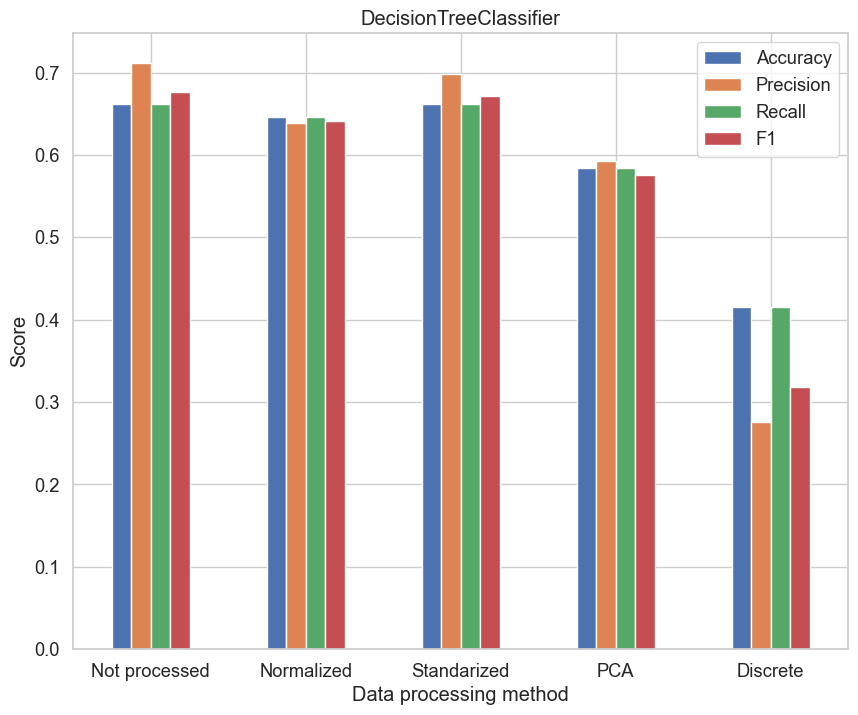

In [26]:

accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, DecisionTreeClassifier())
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

accuracy_norm, precision_norm, recall_norm, f1_norm = train_and_test_model(X_train_norm, X_val_norm, y_train_norm, y_val_norm, DecisionTreeClassifier())
print('Accuracy: ', accuracy_norm)
print('Precision: ', precision_norm)
print('Recall: ', recall_norm)
print('F1: ', f1_norm)

accuracy_stand, precision_stand, recall_stand, f1_stand = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, DecisionTreeClassifier())
print('Accuracy: ', accuracy_stand)
print('Precision: ', precision_stand)
print('Recall: ', recall_stand)
print('F1: ', f1_stand)

accuracy_pca, precision_pca, recall_pca, f1_pca = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, DecisionTreeClassifier())
print('Accuracy: ', accuracy_pca)
print('Precision: ', precision_pca)
print('Recall: ', recall_pca)
print('F1: ', f1_pca)

accuracy_discrete, precision_discrete, recall_discrete, f1_discrete = train_and_test_model(X_train_discrete, X_val_discrete, y_train_discrete, y_val_discrete, DecisionTreeClassifier())
print('Accuracy: ', accuracy_discrete)
print('Precision: ', precision_discrete)
print('Recall: ', recall_discrete)
print('F1: ', f1_discrete)

# compare results of each data processing method in a table
results = pd.DataFrame({'Accuracy': [accuracy, accuracy_norm, accuracy_stand, accuracy_pca, accuracy_discrete],
                        'Precision': [precision, precision_norm, precision_stand, precision_pca, precision_discrete],
                        'Recall': [recall, recall_norm, recall_stand, recall_pca, recall_discrete],
                        'F1': [f1, f1_norm, f1_stand, f1_pca, f1_discrete]},
                        index=['Not processed', 'Normalized', 'Standarized', 'PCA', 'Discrete'])
results

# visualise it in a bar chart
results.plot(kind='bar', figsize=(10, 8))
plt.title('DecisionTreeClassifier')
plt.xlabel('Data processing method')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))


klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)

klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)



In [27]:
def dt_classifiers_create():
    dt_params = [
        {'max_depth': 2, 'min_samples_split': 5, 'criterion': 'gini'},
        {'max_depth': 4, 'min_samples_split': 5, 'criterion': 'gini'},
        {'max_depth': 6, 'min_samples_split': 5, 'criterion': 'gini'},
        {'max_depth': 8, 'min_samples_split': 5, 'criterion': 'gini'},
        {'max_depth': 10, 'min_samples_split': 20, 'criterion': 'gini'},
        {'max_depth': 30, 'min_samples_split': 30, 'criterion': 'gini'},
        {'max_depth': 35, 'min_samples_split': 5, 'criterion': 'gini'},
        {'max_depth': 40, 'min_samples_split': 5, 'criterion': 'gini'}
    ]

    dt_classifiers = []
    for params in dt_params:
        dt = DecisionTreeClassifier(criterion=params.get('criterion'), max_depth=params.get('max_depth'),
                                    min_samples_split=params.get('min_samples_split'))
        dt_classifiers.append(dt)

    return dt_classifiers

# NB classifiers
import numpy as np

def nb_classifiers_create():
    nb_params = np.logspace(0, -9, num=100)
    nb_classifiers = []
    
    for param in nb_params:
        nb = GaussianNB(var_smoothing=param)
        nb_classifiers.append(nb)

    return nb_classifiers

In [39]:
np.logspace(0, -9, num=100)


array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [29]:
# create a function that will iterate of each classifier and show results
def iterate_classifiers(classifiers, X_train, X_val, y_train, y_val):
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'])
    index = 0
    best_iter = 0
    best_accuracy = 0
    for classifier in classifiers:
        accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, classifier)
        
        results.loc[classifier.__class__.__name__ +  str(index)] = [accuracy, precision, recall, f1]
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_iter = index
        index += 1

    print('Best iteration: ', best_iter)
    results.plot(kind='line', figsize=(10, 8))
    plt.title('Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.0, 1.0))


Naive Bayes


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  6


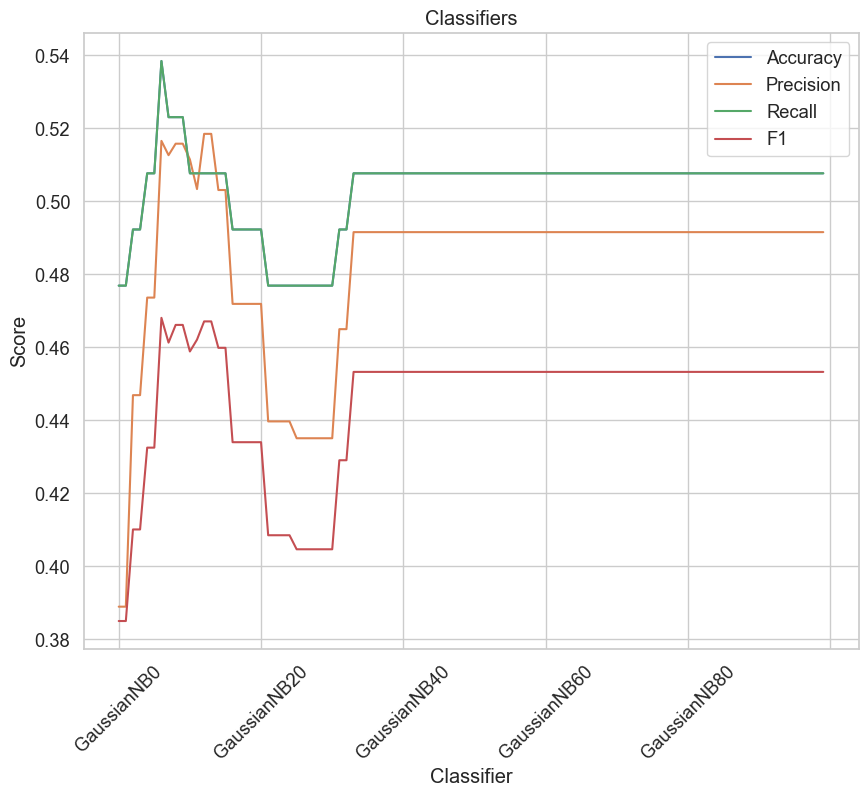

In [30]:
# iterate over NB classifiers
nb_classifiers = nb_classifiers_create()
print('Naive Bayes')
iterate_classifiers(nb_classifiers, X_train_stand, X_val_stand, y_train_stand, y_val_stand)

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best iteration:  1


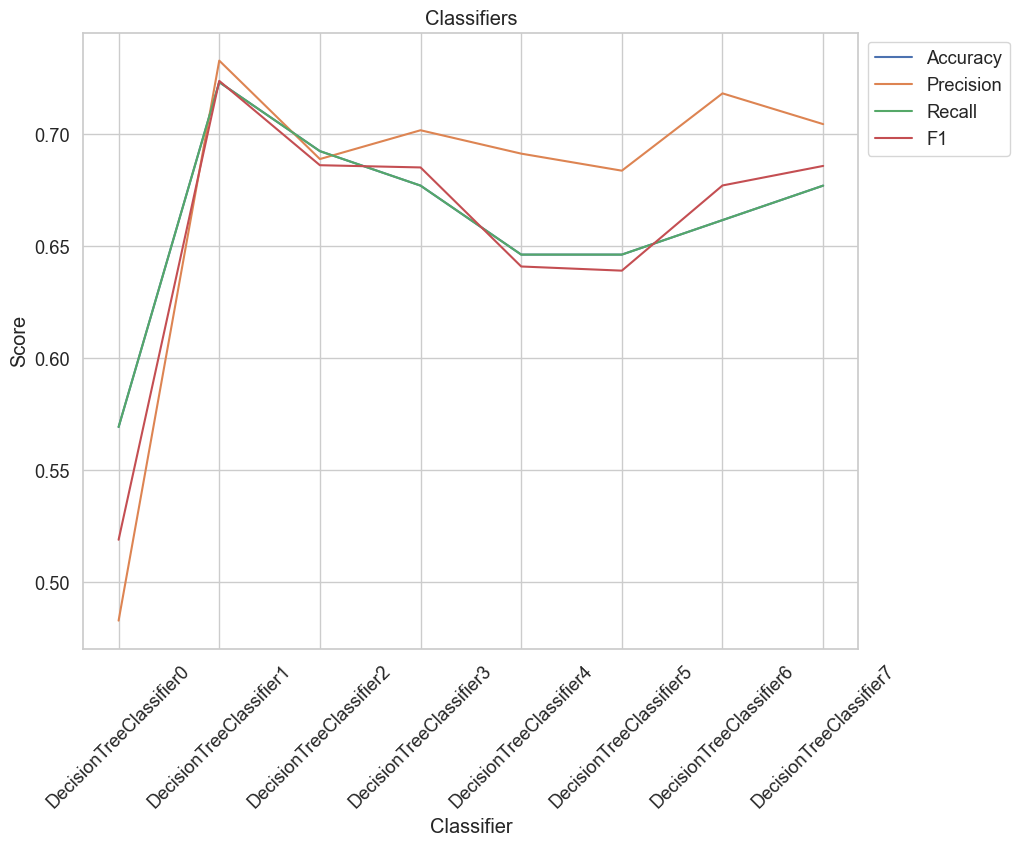

In [31]:
# iterate over DT classifiers
dt_classifiers = dt_classifiers_create()
iterate_classifiers(dt_classifiers, X_train_stand, X_val_stand, y_train_stand, y_val_stand)

ocena klasyfikacji – do porównania wyników różnego typu przygotowania danych oraz wykorzystanego klasyfikatora użyj poznanych metryk oceny klasyfikacji i zinterpretuj wyniki.



Accuracy:  0.5076923076923077
Precision:  0.4736454849498327
Recall:  0.5076923076923077
F1:  0.4325374873882336
Accuracy:  0.7076923076923077
Precision:  0.7065707002549109
Recall:  0.7076923076923077
F1:  0.7014700854700855


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


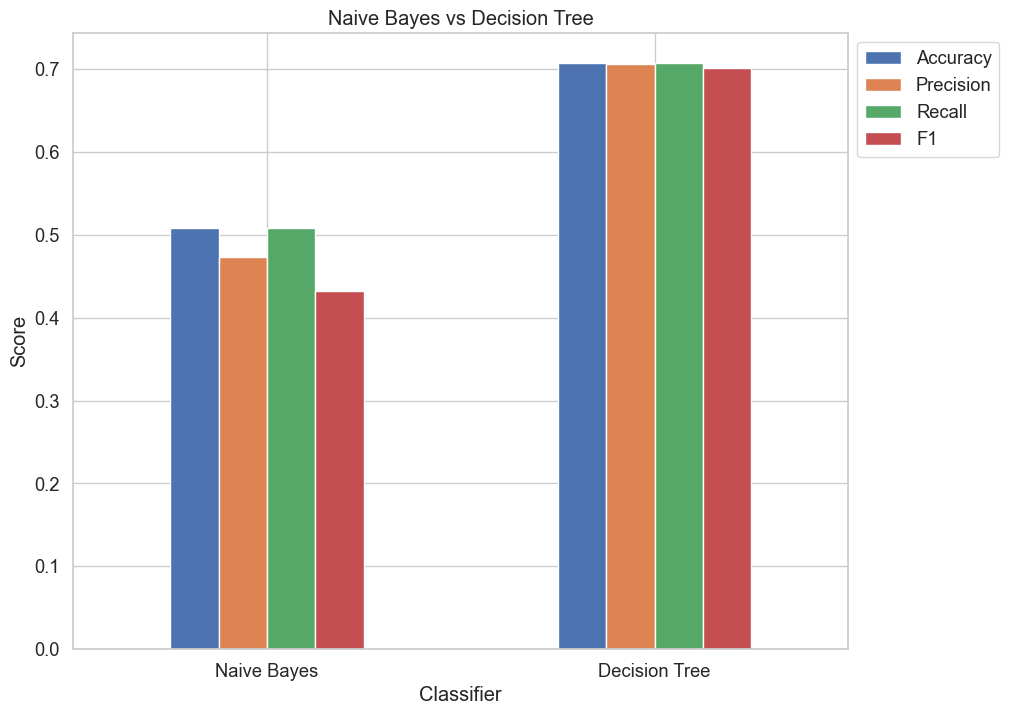

In [32]:
# get standarized data and pca data, create a classfiier of nb and dt give them best hiperparameters and compare results
# NB
nb = GaussianNB(var_smoothing=3.51119173e-01)
accuracy_nb, precision_nb, recall_nb, f1_nb = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, nb)
print('Accuracy: ', accuracy_nb)
print('Precision: ', precision_nb)
print('Recall: ', recall_nb)
print('F1: ', f1_nb)

# DT
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=5)
accuracy_dt, precision_dt, recall_dt, f1_dt = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, dt)
print('Accuracy: ', accuracy_dt)
print('Precision: ', precision_dt)
print('Recall: ', recall_dt)
print('F1: ', f1_dt)

# compare results
results = pd.DataFrame({'Accuracy': [accuracy_nb, accuracy_dt],
                        'Precision': [precision_nb, precision_dt],
                        'Recall': [recall_nb, recall_dt],
                        'F1': [f1_nb, f1_dt]},
                        index=['Naive Bayes', 'Decision Tree'])
results

# visualise it in a bar chart
results.plot(kind='bar', figsize=(10, 8))
plt.title('Naive Bayes vs Decision Tree')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))



Naive Bayes


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  2


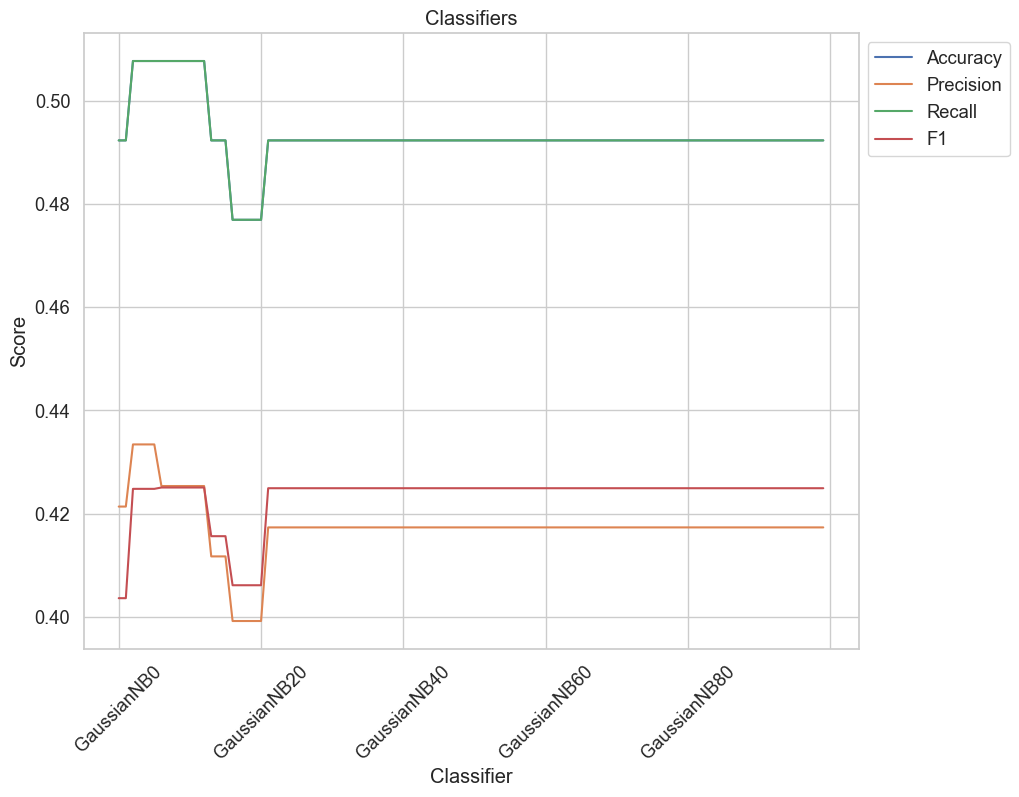

In [33]:
# iterate over NB classifiers
nb_classifiers = nb_classifiers_create()
print('Naive Bayes')
iterate_classifiers(nb_classifiers, X_train_pca, X_val_pca, y_train_pca, y_val_pca)

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  1


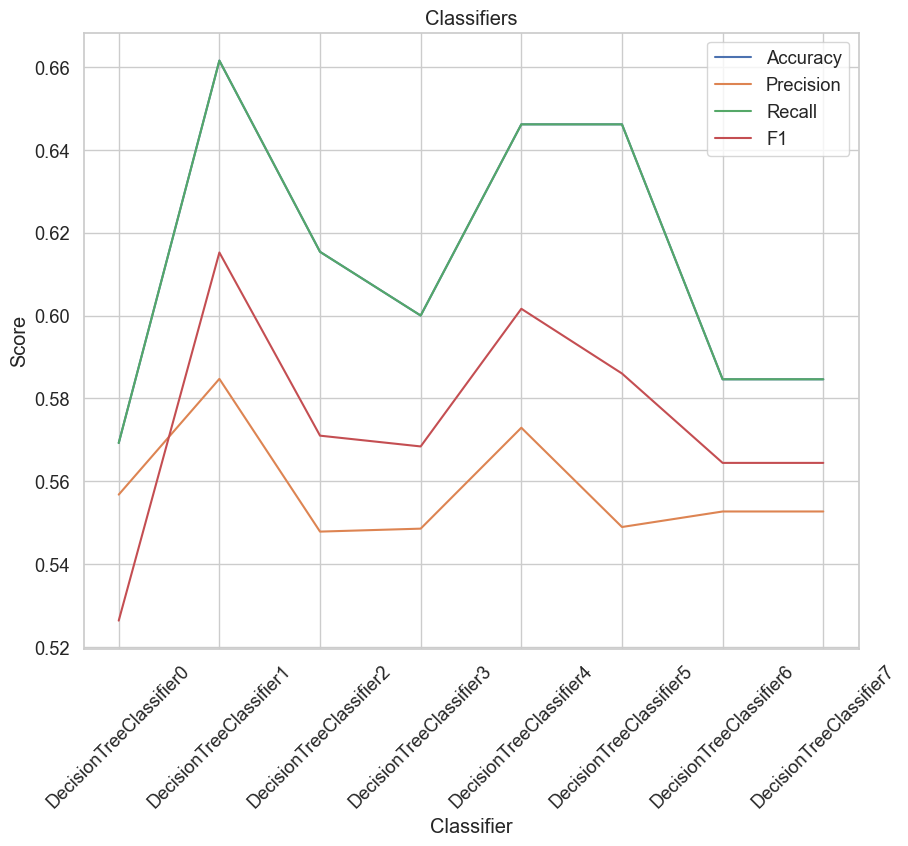

In [36]:
# iterate over DT classifiers
dt_classifiers = dt_classifiers_create()
iterate_classifiers(dt_classifiers, X_train_pca, X_val_pca, y_train_pca, y_val_pca)

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.49230769230769234
Precision:  0.42134615384615387
Recall:  0.49230769230769234
F1:  0.4035902503293808
Accuracy:  0.6615384615384615
Precision:  0.5847174046113038
Recall:  0.6615384615384615
F1:  0.6152240966889085


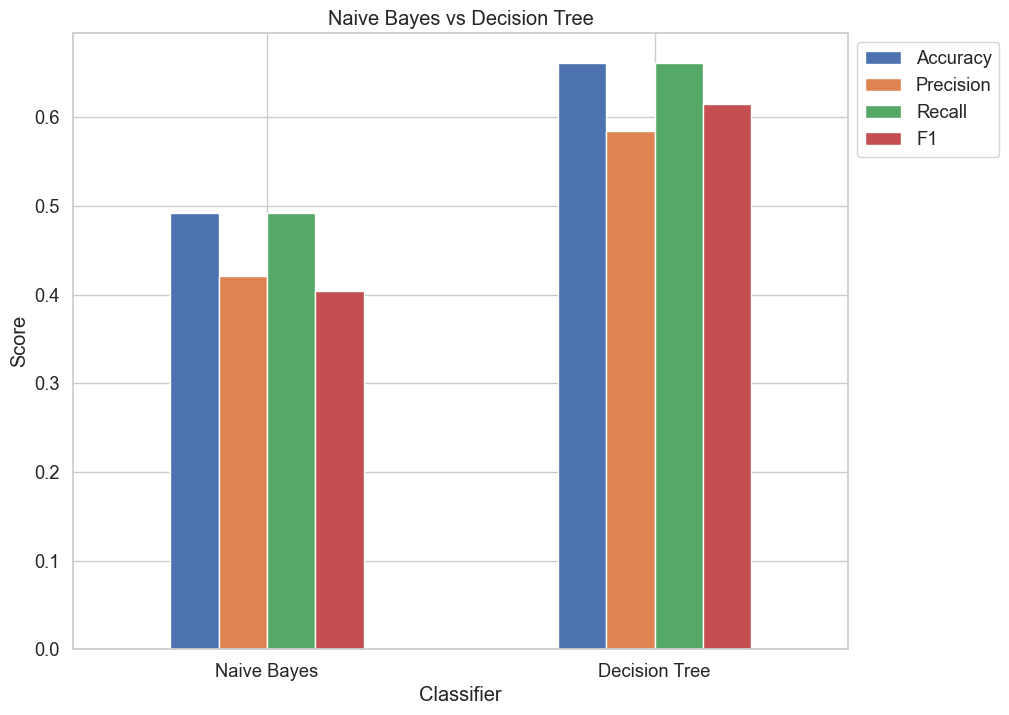

In [40]:
# get standarized data and pca data, create a classfiier of nb and dt give them best hiperparameters and compare results
# NB
nb = GaussianNB(var_smoothing=8.11130831e-01)
accuracy_nb, precision_nb, recall_nb, f1_nb = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, nb)
print('Accuracy: ', accuracy_nb)
print('Precision: ', precision_nb)
print('Recall: ', recall_nb)
print('F1: ', f1_nb)

# DT
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=5)
accuracy_dt, precision_dt, recall_dt, f1_dt = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, dt)
print('Accuracy: ', accuracy_dt)
print('Precision: ', precision_dt)
print('Recall: ', recall_dt)
print('F1: ', f1_dt)

# compare results
results = pd.DataFrame({'Accuracy': [accuracy_nb, accuracy_dt],
                        'Precision': [precision_nb, precision_dt],
                        'Recall': [recall_nb, recall_dt],
                        'F1': [f1_nb, f1_dt]},
                        index=['Naive Bayes', 'Decision Tree'])
results

# visualise it in a bar chart
results.plot(kind='bar', figsize=(10, 8))
plt.title('Naive Bayes vs Decision Tree')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [45]:
def processing():
    return [('None', X_train, X_val, y_train, y_val),
        ('Normalizer', X_train_norm, X_val_norm, y_train_norm, y_val_norm),
        ('StandardScaler', X_train_stand, X_val_stand, y_train_stand, y_val_stand),
        ('PCA', X_train_pca, X_val_pca, y_train_pca, y_val_pca)]

def show_table(title, results):
    print("\n\n\n")
    print("Klasyfikator   " + title + "     | Dokladnosc Precyzja   Czulosc  F1-score  |")
    print("-" * 70)
    for row in results:
        print("{:20s}  |  {:.6f}  {:.6f}  {:.6f}  {:.6f}  |".format(row[0], row[1], row[2], row[3], row[4]))

def run(classifiers):
    results = []

    for name, X_processed_train, X_processed_val, y_processed_train, y_processed_val in processing():
        for classifier in classifiers:
            row = [name + str(i)]
            accuracy, precision, recall, f1 = train_and_test_model(X_processed_train, X_processed_val, y_processed_train, y_processed_val, classifier)
            row.extend([accuracy, precision, recall, f1])
            results.append(row)
    return results

nb_results = run(nb_classifiers_create())


show_table('NB', nb_results)

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 





Klasyfikator   NB     | Dokladnosc Precyzja   Czulosc  F1-score  |
----------------------------------------------------------------------
None8                 |  0.476923  0.397756  0.476923  0.384156  |
None8                 |  0.492308  0.424354  0.492308  0.406482  |
None8                 |  0.492308  0.414625  0.492308  0.406938  |
None8                 |  0.492308  0.414625  0.492308  0.406938  |
None8                 |  0.492308  0.414625  0.492308  0.406938  |
None8                 |  0.492308  0.414625  0.492308  0.406938  |
None8                 |  0.492308  0.414625  0.492308  0.406938  |
None8                 |  0.492308  0.407179  0.492308  0.407627  |
None8                 |  0.507692  0.464056  0.507692  0.433083  |
None8                 |  0.507692  0.464056  0.507692  0.433083  |
None8                 |  0.492308  0.449930  0.492308  0.424213  |
None8                 |  0.476923  0.445832  0.476923  0.417223  |
None8                 |  0.476923  0.445832  0.476923 

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 